# Exploratory Data Analysis
1. Check and remove duplicates if exists
2. Visualization for Numerical features, Categorical features, as well as Time & Event
3. Remove features with pariwise correlation >0.8
4. Output data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
import seaborn as sns
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the preprocessed file
brca = pd.read_csv('/content/drive/My Drive/3799/brca.csv')

In [4]:
y = brca.iloc[:,:2]
x = brca.iloc[:,2:]

In [ ]:
brca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Columns: 20315 entries, status to diagnosis_method=tumor resection
dtypes: float64(20314), int64(1)
memory usage: 167.2 MB


In [ ]:
# summary statistics
brca.describe()

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,...,surgical_procedure=modified radical mastectomy,surgical_procedure=other,surgical_procedure=simple mastectomy,history_of_neoadjuvant_treatment=yes,diagnosis_method=cytology (e.g. peritoneal or pleural fluid),diagnosis_method=excisional biopsy,diagnosis_method=fine needle aspiration biopsy,diagnosis_method=incisional biopsy,"diagnosis_method=other method, specify:",diagnosis_method=tumor resection
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,...,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.00000,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.139944,1260.448563,0.507130,0.067741,0.241763,0.067741,0.201364,0.721840,0.113821,0.068225,...,0.347544,0.240964,0.183503,0.012048,0.019462,0.02595,0.088971,0.014829,0.058387,0.150139
std,0.347090,1190.548115,0.203942,0.122786,0.188070,0.122786,0.329114,0.134244,0.126281,0.073622,...,0.476411,0.427867,0.387258,0.109152,0.138208,0.15906,0.284834,0.120922,0.234583,0.357373
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,464.500000,0.359375,0.000000,0.068182,0.000000,0.000000,0.625000,0.053734,0.029240,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,860.000000,0.507130,0.028571,0.227273,0.028571,0.000000,0.721840,0.068942,0.049308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1688.000000,0.640625,0.067741,0.340909,0.067741,0.201364,0.812500,0.124704,0.081030,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8605.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
features = np.setdiff1d(brca.columns, ['status', 'time']).tolist()

In [ ]:
# Checking for null values
N_null = sum(brca[features].isnull().sum())
print("The brca contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(brca.duplicated(keep='first'))
brca = brca.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = brca.shape[0]

The brca contains 0 null values
The dataset contains 0 duplicates


In [ ]:
categorical_start = brca.columns.get_loc('pathologic_stage=stage ia')

In [ ]:
# define numerical and categorical features
num = brca.iloc[:,2:categorical_start]
cat = brca.iloc[:,categorical_start:]

In [ ]:
cat_cols = cat.columns
num_cols = num.columns

### Numerical features

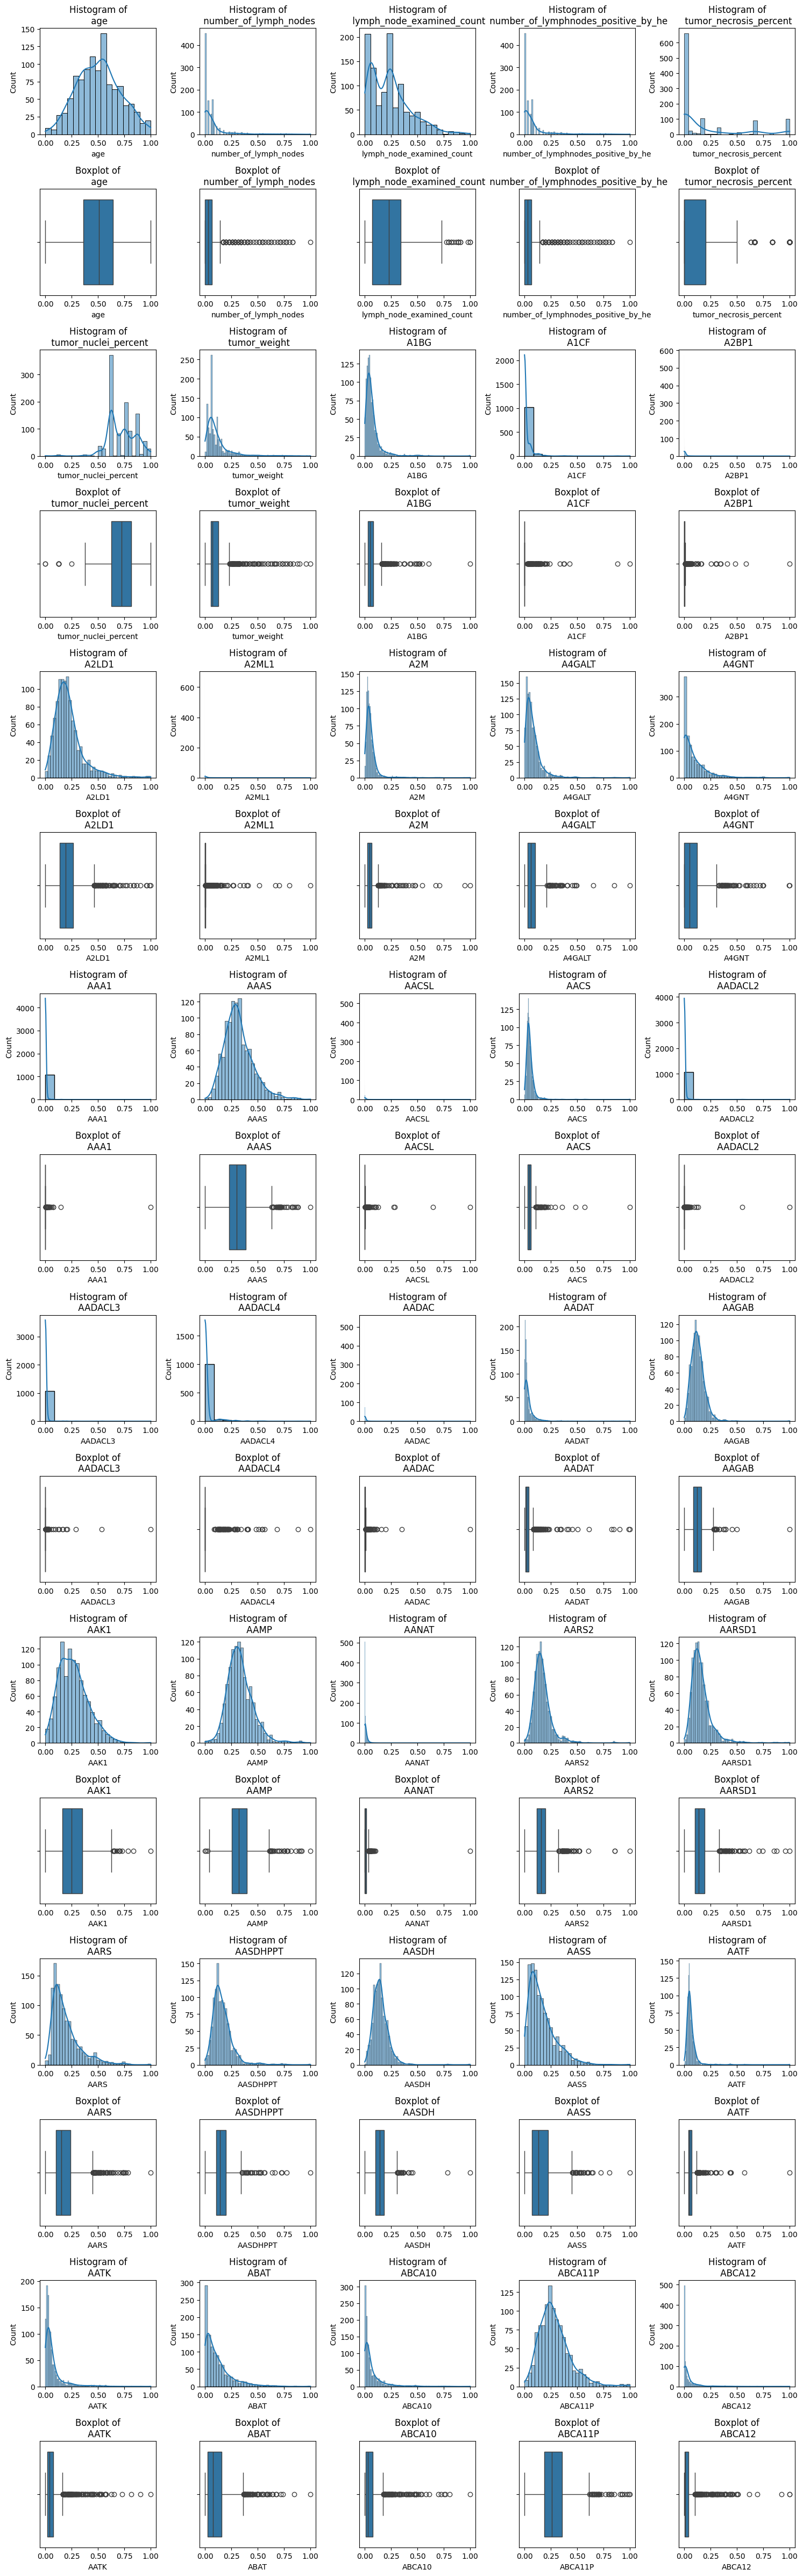

In [ ]:
# Define the number of columns for plots in one row
num_plots = 5

# Plot the first 40 features as example
data = num.iloc[:, :40]  #

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(data.shape[1] / num_plots) * 2

# Create subplots with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_plots, figsize=(15, num_rows * 3))

for i, col in enumerate(data.columns):
    row = (i // num_plots) * 2
    col_index = i % num_plots
    sns.histplot(data[col], kde=True, ax=axs[row, col_index])
    sns.boxplot(x=data[col], ax=axs[row + 1, col_index])
    axs[row, col_index].set_title(f'Histogram of\n {col}')
    axs[row + 1, col_index].set_title(f'Boxplot of\n {col}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Categorical features

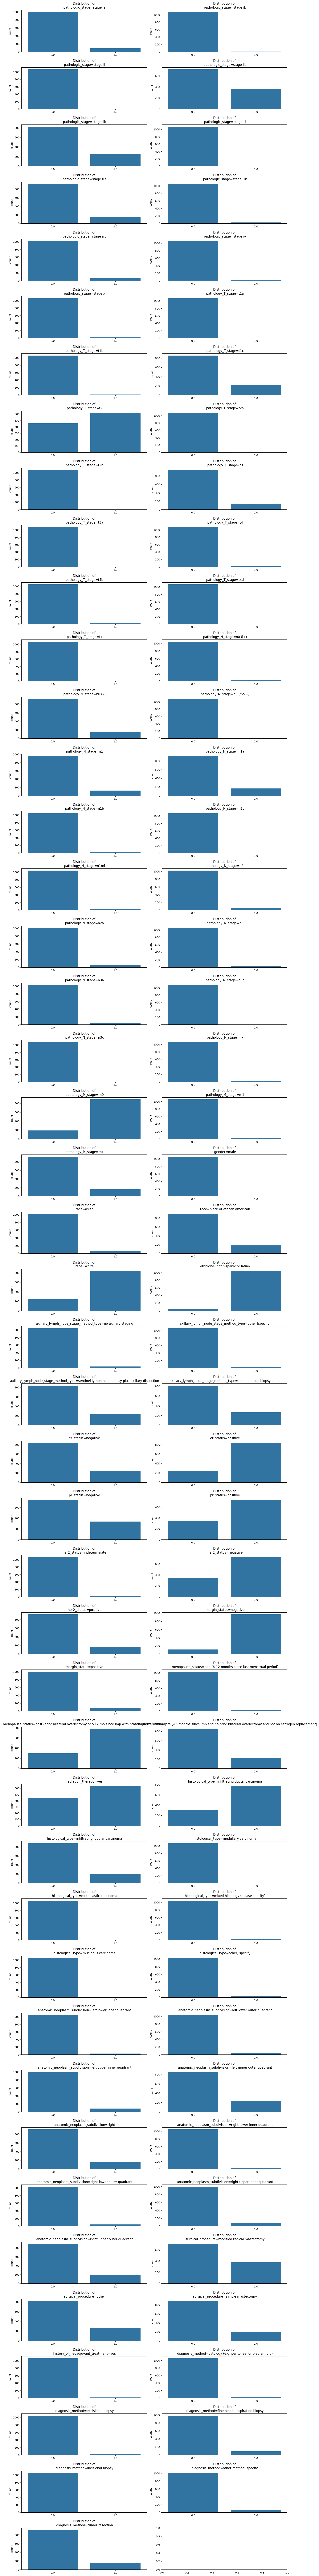

In [ ]:
num_plots = 2  # Number of plots in 1 row

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(cat_cols) / num_plots)

fig, axs = plt.subplots(num_rows, num_plots, figsize=(15, num_rows*3))

for i, col in enumerate(cat_cols):
    row = i // num_plots
    col = i % num_plots

    # Count plot
    sns.countplot(x=cat_cols[i], data=cat, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of\n {cat_cols[i]}')

    # Remove x label
    axs[row, col].set_xlabel('')

plt.tight_layout()
plt.show()

### Time & Event

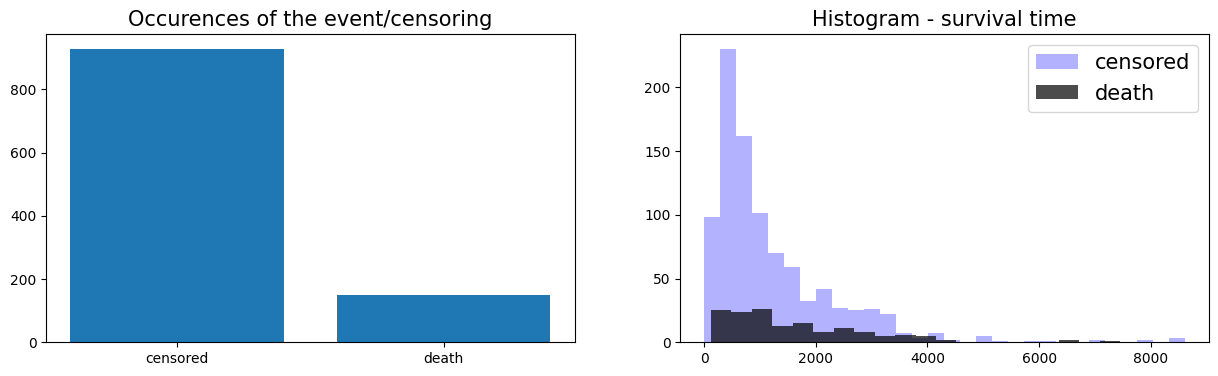

In [ ]:
from collections import Counter

# Creating an empty chart
fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

# Counting the number of occurrences for each category
data = Counter(brca['status'].replace({0:'censored', 1:'death'}))
category = list(data.keys())
counts = list(data.values())
idx = range(len(counts))

# Displaying the occurrences of the event/censoring
ax1.bar(idx, counts)
ax1.set_xticks(idx)
ax1.set_xticklabels(category)
ax1.set_title( 'Occurences of the event/censoring', fontsize=15)

# Showing the histogram of the survival times for the censoring
time_0 = brca.loc[ brca['status'] == 0, 'time']
ax2.hist(time_0, bins=30, alpha=0.3, color='blue', label = 'censored')

# Showing the histogram of the survival times for the events
time_1 = brca.loc[ brca['status'] == 1, 'time']
ax2.hist(time_1, bins=20, alpha=0.7, color='black', label = 'death')
ax2.set_title( 'Histogram - survival time', fontsize=15)

# Displaying everything side-by-side
plt.legend(fontsize=15)
plt.show()

In [ ]:
n_censored = y.shape[0] - y["status"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

86.0% of records are censored


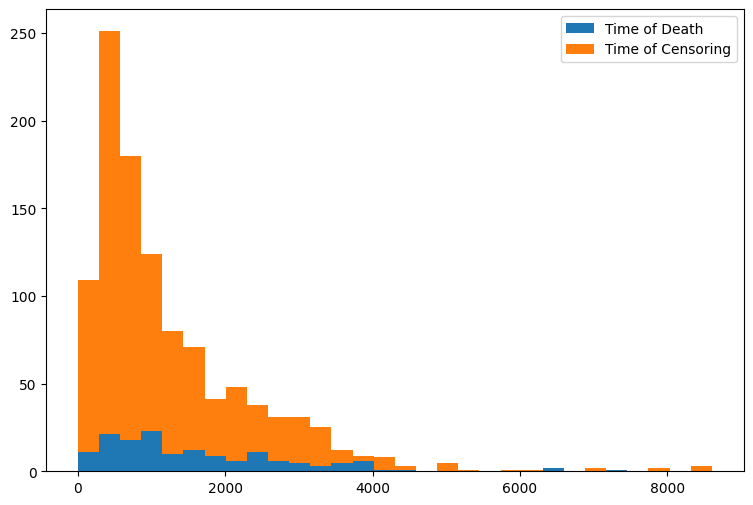

In [ ]:
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist((y["time"][y["status"] == 1], y["time"][y["status"] != 1]), bins=30, stacked=True)
plt.legend(patches, ["Time of Death", "Time of Censoring"])

### Correlations

In [4]:
# corr = brca[features].corr()
corr = brca.corr()

In [ ]:
corr

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,...,surgical_procedure=modified radical mastectomy,surgical_procedure=other,surgical_procedure=simple mastectomy,history_of_neoadjuvant_treatment=yes,diagnosis_method=cytology (e.g. peritoneal or pleural fluid),diagnosis_method=excisional biopsy,diagnosis_method=fine needle aspiration biopsy,diagnosis_method=incisional biopsy,"diagnosis_method=other method, specify:",diagnosis_method=tumor resection
status,1.000000,0.130241,0.085201,0.151285,0.120416,0.151285,-0.111573,-0.039277,0.025275,-0.026391,...,0.098291,0.016331,-0.067006,0.028911,0.001183,0.118989,0.155434,0.127327,0.047663,-0.087282
time,0.130241,1.000000,-0.155660,-0.029815,0.102781,-0.029815,-0.106650,-0.069170,-0.037209,-0.026741,...,-0.050071,0.072046,-0.005706,-0.038960,-0.068004,0.066525,0.085203,0.103786,0.073093,-0.126680
age,0.085201,-0.155660,1.000000,0.005535,-0.084180,0.005535,0.045742,0.062384,-0.069606,0.103008,...,-0.024877,0.052400,-0.049066,0.053082,-0.004414,-0.077648,0.056189,-0.026038,0.007077,-0.038385
number_of_lymph_nodes,0.151285,-0.029815,0.005535,1.000000,0.468555,1.000000,-0.073281,0.017168,0.052675,0.012051,...,0.194219,-0.055370,-0.097334,-0.004401,0.000329,0.056429,0.009927,0.053669,-0.006188,-0.067879
lymph_node_examined_count,0.120416,0.102781,-0.084180,0.468555,1.000000,0.468555,0.005330,-0.015654,0.021386,-0.035081,...,0.306668,-0.060077,-0.163568,-0.019989,-0.010860,0.021573,0.031083,0.058217,0.013999,-0.018366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
diagnosis_method=excisional biopsy,0.118989,0.066525,-0.077648,0.056429,0.021573,0.056429,0.011137,0.010360,0.023097,-0.031165,...,0.027773,-0.037443,-0.032199,-0.018025,-0.022996,1.000000,-0.051008,-0.020025,-0.040644,-0.068604
diagnosis_method=fine needle aspiration biopsy,0.155434,0.085203,0.056189,0.009927,0.031083,0.009927,-0.071225,0.101671,-0.033623,-0.037715,...,0.106887,-0.039067,-0.055642,0.025164,-0.044028,-0.051008,1.000000,-0.038340,-0.077818,-0.131350
diagnosis_method=incisional biopsy,0.127327,0.103786,-0.026038,0.053669,0.058217,0.053669,-0.044796,0.000746,-0.033899,0.003473,...,0.103689,-0.033267,-0.058162,-0.013548,-0.017285,-0.020025,-0.038340,1.000000,-0.030550,-0.051566
"diagnosis_method=other method, specify:",0.047663,0.073093,0.007077,-0.006188,0.013999,-0.006188,-0.116381,-0.052682,0.030979,-0.025150,...,0.058973,0.090752,-0.097628,0.008730,-0.035082,-0.040644,-0.077818,-0.030550,1.000000,-0.104664


In [14]:
corr[corr["time"]>0.5]

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,...,surgical_procedure=modified radical mastectomy,surgical_procedure=other,surgical_procedure=simple mastectomy,history_of_neoadjuvant_treatment=yes,diagnosis_method=cytology (e.g. peritoneal or pleural fluid),diagnosis_method=excisional biopsy,diagnosis_method=fine needle aspiration biopsy,diagnosis_method=incisional biopsy,"diagnosis_method=other method, specify:",diagnosis_method=tumor resection
time,0.130241,1.0,-0.15566,-0.029815,0.102781,-0.029815,-0.10665,-0.06917,-0.037209,-0.026741,...,-0.050071,0.072046,-0.005706,-0.03896,-0.068004,0.066525,0.085203,0.103786,0.073093,-0.12668


In [5]:
corr_rounded = corr.round(2)

In [6]:
# Save the DataFrame to a CSV file as it takes a long time to compute
corr_rounded.to_csv('/content/drive/My Drive/3799/corr_rounded.csv')

In [6]:
corr_rounded = pd.read_csv('/content/drive/My Drive/3799/corr_rounded.csv')

In [7]:
corr_rounded.iloc[2:300,2:300]

,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,A1CF,A2BP1,...,ADAMTS7,ADAMTS8,ADAMTS9,ADAMTSL1,ADAMTSL2,ADAMTSL3,ADAMTSL4,ADAMTSL5,ADAP1,ADAP2
age,1.00,0.01,-0.08,0.01,0.05,0.06,-0.07,0.10,-0.02,0.06,...,-0.04,-0.11,-0.07,0.04,0.02,-0.00,-0.02,0.04,0.04,0.07
number_of_lymph_nodes,0.01,1.00,0.47,1.00,-0.07,0.02,0.05,0.01,-0.03,-0.01,...,0.01,0.00,-0.00,0.03,0.02,-0.02,-0.01,0.05,0.01,0.02
lymph_node_examined_count,-0.08,0.47,1.00,0.47,0.01,-0.02,0.02,-0.04,-0.01,-0.05,...,0.01,0.01,-0.01,-0.03,-0.05,-0.01,-0.02,0.01,-0.02,-0.04
number_of_lymphnodes_positive_by_he,0.01,1.00,0.47,1.00,-0.07,0.02,0.05,0.01,-0.03,-0.01,...,0.01,0.00,-0.00,0.03,0.02,-0.02,-0.01,0.05,0.01,0.02
tumor_necrosis_percent,0.05,-0.07,0.01,-0.07,1.00,-0.30,-0.13,-0.10,-0.00,-0.01,...,0.05,-0.06,0.05,0.03,-0.02,0.05,-0.01,-0.10,-0.04,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADAMTSL3,-0.00,-0.02,-0.01,-0.02,0.05,0.01,0.01,-0.15,0.00,-0.00,...,0.13,-0.04,0.07,0.12,0.05,1.00,-0.02,-0.12,-0.07,0.03
ADAMTSL4,-0.02,-0.01,-0.02,-0.01,-0.01,-0.03,-0.01,-0.03,0.00,-0.04,...,0.12,0.03,0.08,0.06,0.05,-0.02,1.00,-0.01,-0.02,0.10
ADAMTSL5,0.04,0.05,0.01,0.05,-0.10,0.03,-0.03,0.19,-0.07,-0.05,...,-0.03,0.12,-0.10,0.01,0.20,-0.12,-0.01,1.00,0.15,-0.05
ADAP1,0.04,0.01,-0.02,0.01,-0.04,0.08,-0.02,0.28,0.01,0.03,...,-0.04,-0.04,-0.14,-0.09,0.07,-0.07,-0.02,0.15,1.00,0.05


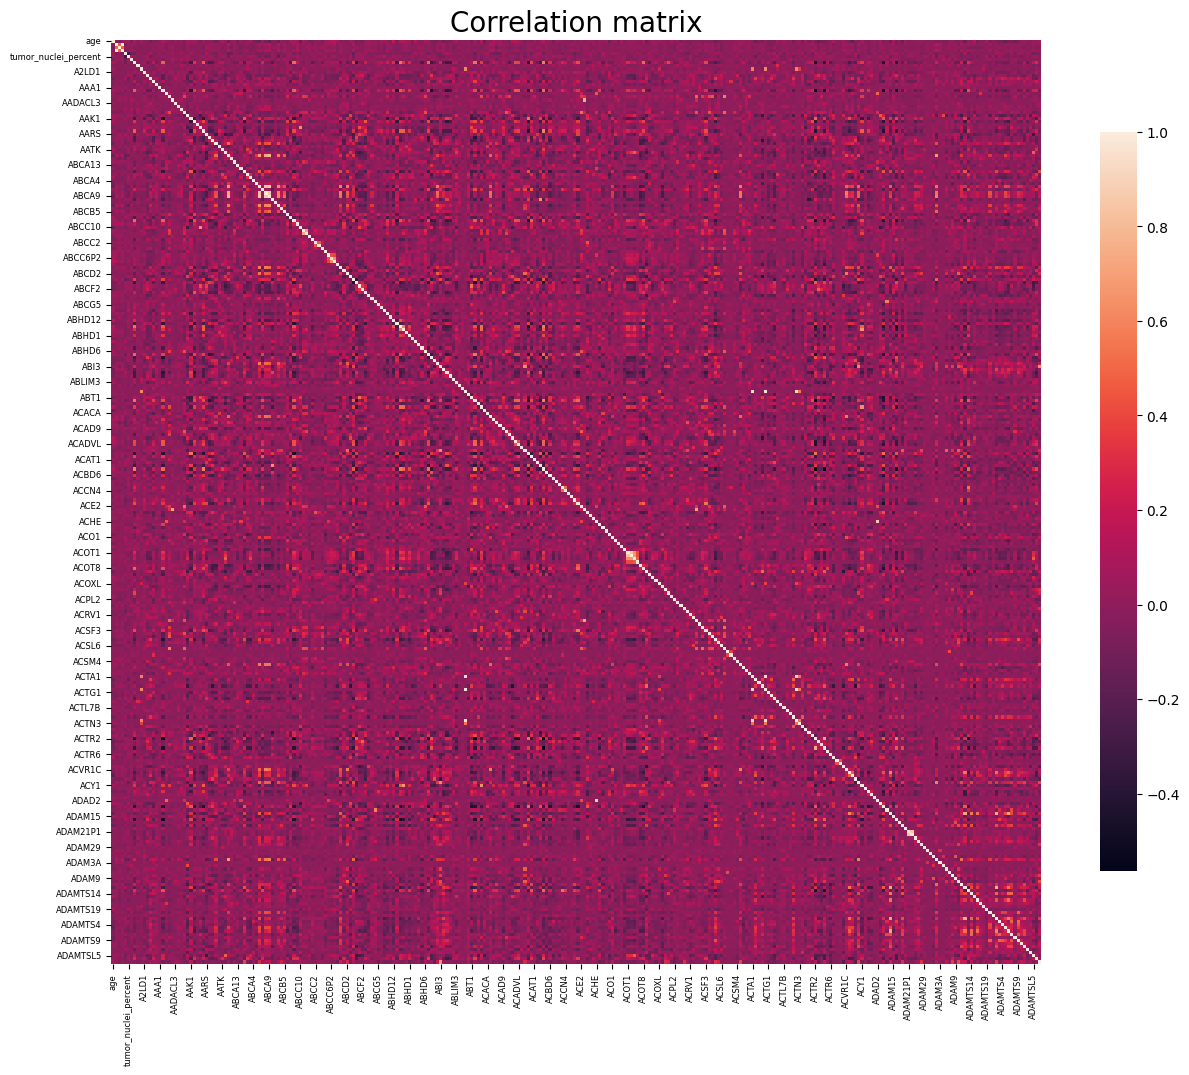

In [11]:
# Take 300 features as example
plt.figure(figsize=(15, 12))
sns.heatmap(corr.iloc[2:300,2:300], annot=False, fmt=".2f", cbar_kws={"shrink": .8})
plt.title("Correlation matrix", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
feat_corr = corr_rounded.iloc[2:,2:]

In [ ]:
# Find highly correlated features
corr_threshold = 0.8  # Adjust the threshold as needed
highly_correlated_pairs = []

for i in range(len(feat_corr.columns)):
    for j in range(i+1, len(feat_corr.columns)):
        if abs(feat_corr.iloc[i, j]) > corr_threshold:
            highly_correlated_pairs.append((feat_corr.columns[i], feat_corr.columns[j]))

In [ ]:
highly_correlated_pairs

[('number_of_lymph_nodes', 'number_of_lymphnodes_positive_by_he'),
 ('AADACL2', 'ARG1'),
 ('AADACL2', 'ASPRV1'),
 ('AADACL2', 'BEST2'),
 ('AADACL2', 'BPIL2'),
 ('AADACL2', 'C1orf68'),
 ('AADACL2', 'CCL27'),
 ('AADACL2', 'FLG2'),
 ('AADACL2', 'FLG'),
 ('AADACL2', 'IL1F10'),
 ('AADACL2', 'KCNK7'),
 ('AADACL2', 'KPRP'),
 ('AADACL2', 'KRT10'),
 ('AADACL2', 'KRT1'),
 ('AADACL2', 'KRT2'),
 ('AADACL2', 'KRTDAP'),
 ('AADACL2', 'LCE1A'),
 ('AADACL2', 'LCE1B'),
 ('AADACL2', 'LCE1C'),
 ('AADACL2', 'LCE1D'),
 ('AADACL2', 'LCE1E'),
 ('AADACL2', 'LCE1F'),
 ('AADACL2', 'LCE2A'),
 ('AADACL2', 'LCE2B'),
 ('AADACL2', 'LCE2C'),
 ('AADACL2', 'LCE2D'),
 ('AADACL2', 'LCE4A'),
 ('AADACL2', 'LCE5A'),
 ('AADACL2', 'LCE6A'),
 ('AADACL2', 'LGALS7'),
 ('AADACL2', 'LIPM'),
 ('AADACL2', 'LOR'),
 ('AADACL2', 'MLANA'),
 ('AADACL2', 'NKPD1'),
 ('AADACL2', 'PHYHIP'),
 ('AADACL2', 'RDH12'),
 ('AADACL2', 'SMAD5OS'),
 ('AADACL2', 'TYR'),
 ('AADACL2', 'WFDC5'),
 ('AADAC', 'OR11H4'),
 ('AANAT', 'CDK5R2'),
 ('ABCA6', 'ABCA8'

In [ ]:
# Remove one feature from each highly correlated pair
features_to_remove = set()
for pair in highly_correlated_pairs:
    feature1, feature2 = pair
    if feature1 not in features_to_remove:
        features_to_remove.add(feature2)

# Remove highly correlated features from the dataset
brca_filtered = brca.drop(columns=features_to_remove)

print("\nRemoved Features:")
print(features_to_remove)


Removed Features:
{'GABRA4', 'TMEM208', 'LILRB1', 'LOC340508', 'MTFR1', 'STAT4', 'ZNF324', 'ITGB7', 'KIAA1467', 'RNLS', 'HSF1', 'CPA1', 'HVCN1', 'CKM', 'PSMB8', 'OMG', 'GLYAT', 'TIMM13', 'LST1', 'CR2', 'CDH10', 'CCR5', 'FERMT3', 'TMEM176B', 'CENPT', 'KIF23', 'LCE6A', 'RBM42', 'LIPK', 'CSDA', 'CEMP1', 'XRRA1', 'AQP7', 'HLA-DMB', 'APOL3', 'FAM173A', 'ROBLD3', 'IFITM5', 'ARHGAP25', 'KLK12', 'NCKAP1L', 'FAM50A', 'GPR85', 'IL1F10', 'DOK2', 'SNAP25', 'MRPL51', 'DCLRE1B', 'NPR1', 'FBL', 'TRAF3IP3', 'EIF1AY', 'PTGDS', 'TBC1D15', 'ST7OT3', 'SNORD17', 'LRRC57', 'HSFX1', 'DARC', 'RDH12', 'HLA-DOA', 'HEG1', 'C10orf88', 'TNR', 'C17orf89', 'CREB3L3', 'GTF2IRD2', 'TMEM190', 'KRTDAP', 'VGLL2', 'LECT1', 'HLA-DRB6', 'KCNA3', 'CLDN5', 'SNRNP70', 'SIVA1', 'SGTA', 'SDR9C7', 'GPR183', 'XAGE3', 'SNAR-C4', 'POU2F3', 'CLEC10A', 'MS4A4A', 'UGT1A1', 'KRTAP6-2', 'OR5M8', 'GPKOW', 'PRF1', 'FOXL2', 'CD1E', 'COX4I1', 'PROK1', 'CKAP2L', 'HAO1', 'MPZ', 'CT45A6', 'ICT1', 'FAM35B', 'MYH2', 'PDGFRL', 'TMEM150B', 'LOR', 

In [ ]:
features_to_remove

{'GABRA4',
 'TMEM208',
 'LILRB1',
 'LOC340508',
 'MTFR1',
 'STAT4',
 'ZNF324',
 'ITGB7',
 'KIAA1467',
 'RNLS',
 'HSF1',
 'CPA1',
 'HVCN1',
 'CKM',
 'PSMB8',
 'OMG',
 'GLYAT',
 'TIMM13',
 'LST1',
 'CR2',
 'CDH10',
 'CCR5',
 'FERMT3',
 'TMEM176B',
 'CENPT',
 'KIF23',
 'LCE6A',
 'RBM42',
 'LIPK',
 'CSDA',
 'CEMP1',
 'XRRA1',
 'AQP7',
 'HLA-DMB',
 'APOL3',
 'FAM173A',
 'ROBLD3',
 'IFITM5',
 'ARHGAP25',
 'KLK12',
 'NCKAP1L',
 'FAM50A',
 'GPR85',
 'IL1F10',
 'DOK2',
 'SNAP25',
 'MRPL51',
 'DCLRE1B',
 'NPR1',
 'FBL',
 'TRAF3IP3',
 'EIF1AY',
 'PTGDS',
 'TBC1D15',
 'ST7OT3',
 'SNORD17',
 'LRRC57',
 'HSFX1',
 'DARC',
 'RDH12',
 'HLA-DOA',
 'HEG1',
 'C10orf88',
 'TNR',
 'C17orf89',
 'CREB3L3',
 'GTF2IRD2',
 'TMEM190',
 'KRTDAP',
 'VGLL2',
 'LECT1',
 'HLA-DRB6',
 'KCNA3',
 'CLDN5',
 'SNRNP70',
 'SIVA1',
 'SGTA',
 'SDR9C7',
 'GPR183',
 'XAGE3',
 'SNAR-C4',
 'POU2F3',
 'CLEC10A',
 'MS4A4A',
 'UGT1A1',
 'KRTAP6-2',
 'OR5M8',
 'GPKOW',
 'PRF1',
 'FOXL2',
 'CD1E',
 'COX4I1',
 'PROK1',
 'CKAP2L',
 'HAO1

In [ ]:
print(brca.shape)
print(brca_filtered.shape)

(1079, 20315)
(1079, 18357)


In [ ]:
# Save the DataFrame to a CSV file
brca_filtered.to_csv('/content/drive/My Drive/3799/brca_filtered.csv', index=False)